# Tokenizers

Tokenizers are one of the core components of the NLP pipeline. They serve one purpose: to translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data. In this section, we’ll explore exactly what happens in the tokenization pipeline.



## 1. Word-based

The first type of tokenizer that comes to mind is word-based. It’s generally very easy to set up and use with only a few rules, and it often yields decent results. For example, in the image below, the goal is to split the raw text into words and find a numerical representation for each of them:



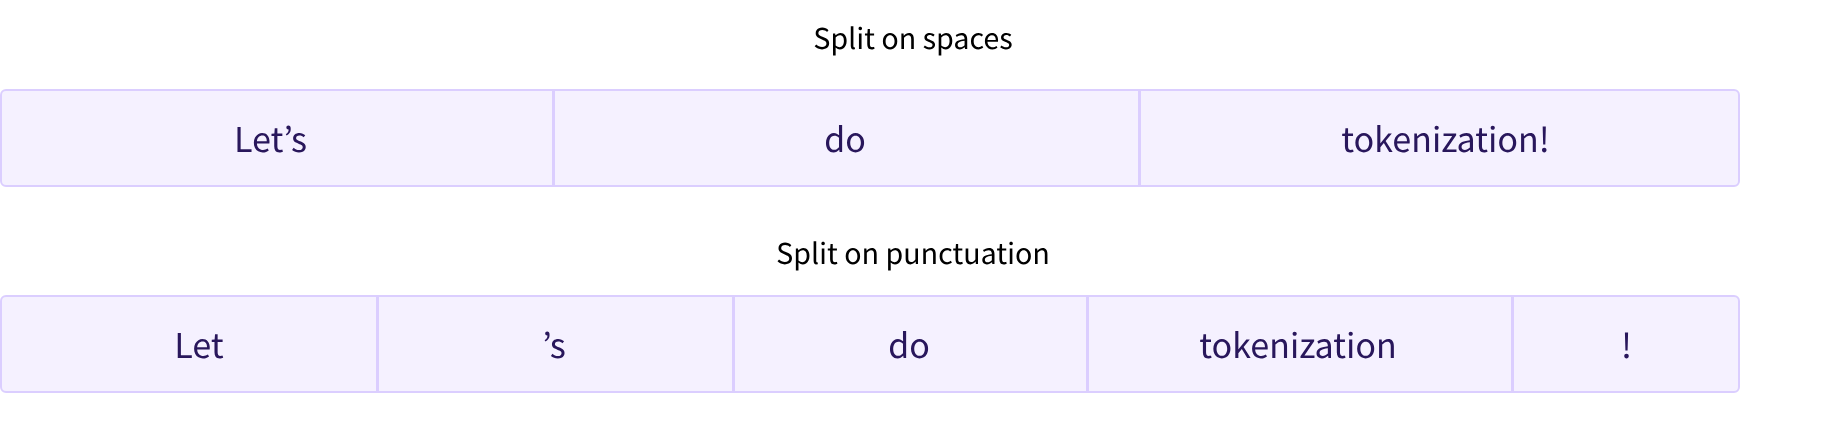

There are also variations of word tokenizers that have extra rules for punctuation. With this kind of tokenizer, we can end up with some pretty large “vocabularies,” where a vocabulary is defined by the total number of independent tokens that we have in our corpus.



If we want to completely cover a language with a word-based tokenizer, we’ll need to have an identifier for each word in the language, which will generate a huge amount of tokens. For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we’d need to keep track of that many IDs. Furthermore, words like “dog” are represented differently from words like “dogs”, and the model will initially have no way of knowing that “dog” and “dogs” are similar: it will identify the two words as unrelated. The same applies to other similar words, like “run” and “running”, which the model will not see as being similar initially.



Finally, we need a custom token to represent words that are not in our vocabulary. This is known as the “unknown” token, often represented as `”[UNK]”` or `”<unk>”`. It’s generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way. The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.



## 2. Character-based

Character-based tokenizers split the text into characters, rather than words. This has two primary benefits:

* The vocabulary is much smaller.

* There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

But here too some questions arise concerning spaces and punctuation:

This approach isn’t perfect either. Since the representation is now based on characters rather than words, one could argue that, intuitively, it’s less meaningful: each character doesn’t mean a lot on its own, whereas that is the case with words. 

Another thing to consider is that we’ll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.



To get the best of both worlds, we can use a third technique that combines the two approaches: `subword tokenization`.



## 3. Subword tokenization

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.



For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.



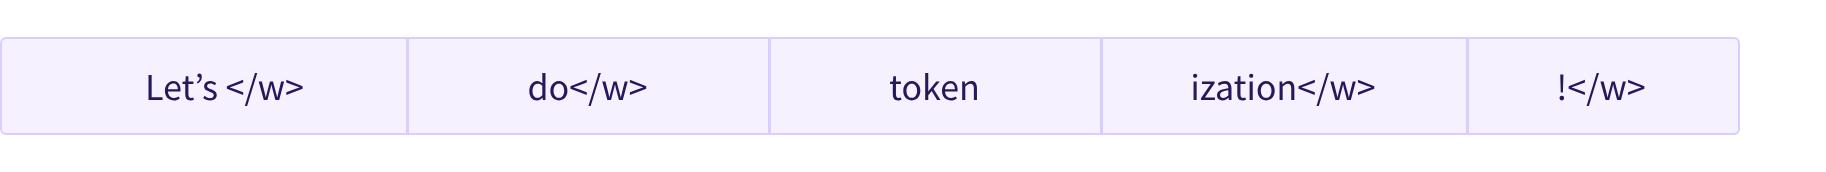

### And more!
Unsurprisingly, there are many more techniques out there. To name a few:

* Byte-level BPE, as used in GPT-2

* WordPiece, as used in BERT

* SentencePiece or Unigram, as used in several multilingual models

## 4. Encoding

Translating text to numbers is known as encoding. Encoding is done in a two-step process: the tokenization, followed by the conversion to input IDs.



### 4.1. Tokenization

The tokenization process is done by the `tokenize()` method of the tokenizer:



In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using Transformer in practice is simple."
tokens = tokenizer.tokenize(sequence)
tokens

['Using', 'Trans', '##former', 'in', 'practice', 'is', 'simple', '.']

This tokenizer is a subword tokenizer: it splits the words until it obtains tokens that can be represented by its vocabulary. That’s the case here with `transformer`, which is split into two tokens: `transform` and `##er`.



### 4.2. From tokens to input IDs


The conversion to input IDs is handled by the convert_tokens_to_ids() tokenizer method:



In [2]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[7993, 13809, 23763, 1107, 2415, 1110, 3014, 119]

## 5. Decoding

Decoding is going the other way around: from vocabulary indices, we want to get a string. This can be done with the `decode()` method as follows:



In [3]:
decoded_string = tokenizer.decode(ids)
decoded_string

'Using Transformer in practice is simple.'

Note that the `decode()` method not only converts the indices back to tokens, but also groups together the tokens that were part of the same words to produce a readable sentence. This behavior will be extremely useful when we use models that predict new text (either text generated from a prompt, or for sequence-to-sequence problems like translation or summarization).

